In [3]:
import sys
import os

# Get the current directory of the notebook
notebook_dir = os.path.abspath('')
# Get the parent directory (project directory)
project_dir = os.path.dirname(notebook_dir)
# Get the parent of the parent directory (grandparent directory)
grandparent_dir = os.path.dirname(project_dir)
# Add the grandparent directory to the Python path
sys.path.append(grandparent_dir)

<hr>

In [4]:
import numpy as np;

from util import excel_table;
from util.structs import DataCluster;
from util.structs import Dataset;
from util.structs import Measurement;
from util.structs import Unit;

table_1 = excel_table.read("./data/102.a", has_header=True);
data_a = DataCluster()

for row in table_1:
    data_a.add(Dataset({
        "n": Measurement(row[0], 0),
        "T(n)": Measurement(row[1], .5),
    }))

for row in data_a:
    row["T"] = row["T(n)"] / row["n"];
    row["nu"] = 1 / row["T"];

mean = data_a.mean();
print(data_a)
print("mean: \n\t", mean)

TypeError: read() got an unexpected keyword argument 'has_header'

In [3]:
table_2 = excel_table.read("./data/102.b", has_header=True);
data_b_1 = DataCluster()
data_b_3 = DataCluster()
data_b_5 = DataCluster()

for row in table_2:
    data_b_1.add(Dataset({
        "n": Measurement(row[0], 0),
        "phi": Measurement(row[1], .2),
    }))
    data_b_3.add(Dataset({
        "n": Measurement(row[0], 0),
        "phi": Measurement(row[2], .2),
    }))
    data_b_5.add(Dataset({
        "n": Measurement(row[0], 0),
        "phi": Measurement(row[3], .2),
    }))

for data in [data_b_1, data_b_3, data_b_5]:
    for row in data:
        if row["phi"].value == 0:
            row["ln"] = np.nan;
            continue;
        value = np.log(row["phi"].value)
        error = row["phi"].error / row["phi"].value;
        row["ln"] = Measurement(value, error)

data_b_1 = data_b_1.filter_null();
data_b_3 = data_b_3.filter_null();
data_b_5 = data_b_5.filter_null();

K                  | ΔK                    | Q                  | ΔQ                  | m                   | Δm                   | n                  | Δn                  
-------------------+-----------------------+--------------------+---------------------+---------------------+----------------------+--------------------+---------------------
1.0394090761633843 | 0.0012592176079874154 | 81.27816788833327  | 2.5474884371808004  | -0.0386523556720173 | 0.001211474516496794 | 2.490612700855399  | 0.008935312394383079
1.2720771552035688 | 0.006794617675381264  | 13.054552406414487 | 0.28975148507869547 | -0.2406511196849721 | 0.005341356573842355 | 2.4992864557485985 | 0.013256994097149578
1.80648401376783   | 0.02134991816120761   | 5.312286153969291  | 0.10616347875595529 | -0.5913824222820573 | 0.011818492717617543 | 2.8918232817986773 | 0.010606633120068668



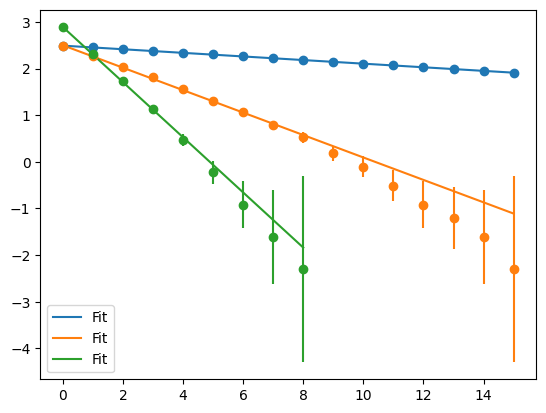

In [4]:
from util.graph_fit import GraphFit
import matplotlib.pyplot as plt

plot = plt.subplots();
fig, ax = plot;

data_c = DataCluster();
for data in [data_b_1, data_b_3, data_b_5]:
    func, params = GraphFit.Linear.on_data(data, "n", "ln", plot = plot)
    data_c.add(params)
    
for row in data_c:
    value = np.exp(-row["m"].value)
    error = np.exp(-row["m"].value) * row["m"].error;

    row["K"] = Measurement(value, error)
    row["Q"] = np.pi / -row["m"]


print(data_c)

In [5]:
table_3 = excel_table.read("./data/102.d", has_header=True);
data_d = DataCluster();

for row in table_3:
    data_d.add(Dataset({
        "n": Measurement(10, 0),
        "T(n)": Measurement(row[0], 0.5),
        "U": Measurement(row[1], 0.01 * row[1] + 0.02),
    }))

print(data_d)

T(n)  | ΔT(n) | U     | ΔU                   | n    | Δn 
------+-------+-------+----------------------+------+----
96.63 | 0.5   | 2.54  | 0.0454               | 10.0 | 0.0
70.47 | 0.5   | 3.07  | 0.050699999999999995 | 10.0 | 0.0
52.09 | 0.5   | 3.7   | 0.05700000000000001  | 10.0 | 0.0
28.0  | 0.5   | 5.92  | 0.0792               | 10.0 | 0.0
18.66 | 0.5   | 8.38  | 0.10380000000000002  | 10.0 | 0.0
15.28 | 0.5   | 9.98  | 0.1198               | 10.0 | 0.0
12.37 | 0.5   | 11.89 | 0.1389               | 10.0 | 0.0



In [6]:
for row in data_d:
    row["T"] = row["T(n)"] / row["n"];
    row["w"] = 1 / row["T"]

print(data_d)

T                  | ΔT   | T(n)  | ΔT(n) | U     | ΔU                   | n    | Δn  | w                   | Δw                   
-------------------+------+-------+-------+-------+----------------------+------+-----+---------------------+----------------------
9.663              | 0.05 | 96.63 | 0.5   | 2.54  | 0.0454               | 10.0 | 0.0 | 0.1034875297526648  | 0.0005354834407154342
7.047              | 0.05 | 70.47 | 0.5   | 3.07  | 0.050699999999999995 | 10.0 | 0.0 | 0.14190435646374344 | 0.0010068423191694584
5.2090000000000005 | 0.05 | 52.09 | 0.5   | 3.7   | 0.05700000000000001  | 10.0 | 0.0 | 0.19197542714532537 | 0.0018427282313815065
2.8                | 0.05 | 28.0  | 0.5   | 5.92  | 0.0792               | 10.0 | 0.0 | 0.35714285714285715 | 0.006377551020408165 
1.866              | 0.05 | 18.66 | 0.5   | 8.38  | 0.10380000000000002  | 10.0 | 0.0 | 0.5359056806002144  | 0.014359744924978948 
1.528              | 0.05 | 15.28 | 0.5   | 9.98  | 0.1198               | 1

m: ( 74.797 ±   0.948)e-3 [⋅], n: (-86.645 ±   2.644)e-3 [⋅]


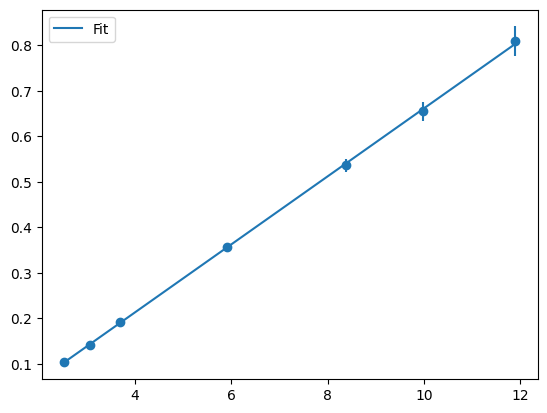

In [7]:
func, res = GraphFit.Linear.on_data(data_d, "U", "w")
print(res);
m_frequenz = res["m"]
n = res["n"]

In [8]:
table_4 = excel_table.read("./data/102.e", has_header=True);
data_e = DataCluster()

for row in table_4:
    data_e.add(Dataset({
        "U": Measurement(row[0], 0.01 * row[0]),
        "phi_0.3": Measurement(row[1], .2),
        "phi_0.5": Measurement(row[2], .2),
    }))

print(data_e)


U     | ΔU                  | phi_0.3 | Δphi_0.3 | phi_0.5 | Δphi_0.5
------+---------------------+---------+----------+---------+---------
4.01  | 0.0401              | 1.0     | 0.2      | 1.0     | 0.2     
6.02  | 0.0602              | 1.3     | 0.2      | 1.3     | 0.2     
7.05  | 0.0705              | 1.9     | 0.2      | 1.8     | 0.2     
7.16  | 0.0716              | 2.0     | 0.2      | 1.8     | 0.2     
7.27  | 0.0727              | 2.2     | 0.2      | 2.0     | 0.2     
7.42  | 0.0742              | 2.4     | 0.2      | 2.1     | 0.2     
7.5   | 0.075               | 2.6     | 0.2      | 2.2     | 0.2     
7.61  | 0.0761              | 3.1     | 0.2      | 2.4     | 0.2     
7.76  | 0.0776              | 3.6     | 0.2      | 2.6     | 0.2     
7.85  | 0.0785              | 4.5     | 0.2      | 2.8     | 0.2     
8.04  | 0.0804              | 6.7     | 0.2      | 2.9     | 0.2     
8.13  | 0.08130000000000001 | 7.4     | 0.2      | 3.0     | 0.2     
8.23  | 0.0823000000

In [9]:
for row in data_e:
    row["nu"] = (m_frequenz * row["U"].value + n);

data_e.print()

data_e.save_to_csv("./output/102.e")

U     | ΔU                  | nu                  | Δnu                  | phi_0.3 | Δphi_0.3 | phi_0.5 | Δphi_0.5
------+---------------------+---------------------+----------------------+---------+----------+---------+---------
4.01  | 0.0401              | 0.21329175891016544 | 0.004629453122853814 | 1.0     | 0.2      | 1.0     | 0.2     
6.02  | 0.0602              | 0.3636342111652246  | 0.006287752999608179 | 1.3     | 0.2      | 1.3     | 0.2     
7.05  | 0.0705              | 0.4406753682909515  | 0.007185042687347413 | 1.9     | 0.2      | 1.8     | 0.2     
7.16  | 0.0716              | 0.4489030646830194  | 0.007282067444327038 | 2.0     | 0.2      | 1.8     | 0.2     
7.27  | 0.0727              | 0.45713076107508727 | 0.007379288974628351 | 2.2     | 0.2      | 2.0     | 0.2     
7.42  | 0.0742              | 0.46835034706427076 | 0.007512167095646399 | 2.4     | 0.2      | 2.1     | 0.2     
7.5   | 0.075               | 0.47433412625850196 | 0.007583172842650142 | 2.6  

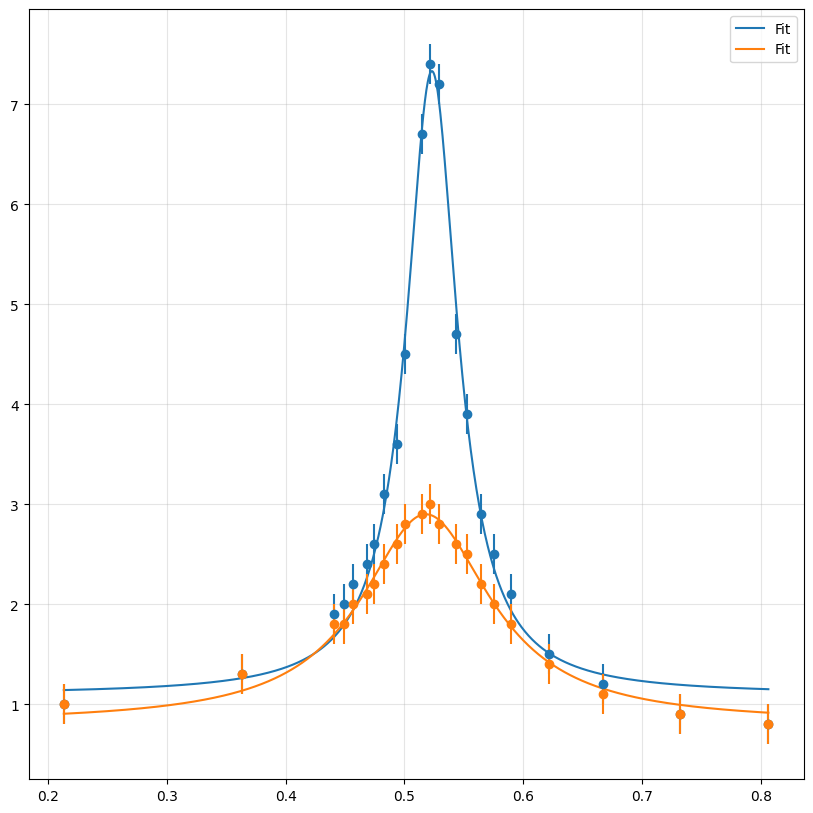

In [10]:
from util import function_analysis;

plot = plt.subplots(figsize=(10, 10));
fig, ax = plot;

ax.grid(alpha=.33)

func_03, _ = GraphFit.InverseSquare.on_data(data_e, "nu", "phi_0.3", plot=plot)
max_03 = function_analysis.find_max(func_03, (0, 1))

func_05, _ = GraphFit.InverseSquare.on_data(data_e, "nu", "phi_0.5", plot=plot)
max_05 = function_analysis.find_max(func_05, (0, 1))

In [11]:
max_nu_03, max_phi_03 = max_03
max_nu_05, max_phi_05 = max_05

sqrt2_phi_03 = 1/np.sqrt(2) * max_phi_03;
sqrt2_phi_05 = 1/np.sqrt(2) * max_phi_05;

x_1, x_2 = function_analysis.find_x_for_y(func_03, sqrt2_phi_03, (0, 1))
d_nu_03 = Measurement(abs(x_1 - x_2), 10e-3)
x_1, x_2 = function_analysis.find_x_for_y(func_05, sqrt2_phi_05, (0, 1))
d_nu_05 = Measurement(abs(x_1 - x_2), 10e-3)

print(max_nu_03 / d_nu_03)
print(max_nu_05 / d_nu_05)

( 13.739 ±   3.608) [⋅]
(  4.708 ±   0.428) [⋅]
